In [11]:
import sys
import random
import math
import numpy as np
import sklearn
import pandas as pd

import os 
from os import listdir, walk
from os.path import isfile, join

import sys
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns
sns.set_theme(style="darkgrid")

In [12]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  x = np.zeros((len(df[name]),1))
  y = np.zeros((len(df[name]),1))
  for i in range (len(percent)): 
    phi = percent[i] * 2 * math.pi / 100
    x[i] = math.cos(phi)
    y[i] = math.sin(phi)
    
  df['x'] = x
  df['y'] = y

In [23]:
def encode_phase(df, name):
    phase = df[name].values.tolist()
    x = np.zeros((len(df[name]),1))
    y = np.zeros((len(df[name]),1))
    for i in range (len(phase)): 
        phi = math.radians(phase[i])
        x[i] = math.cos(phi)
        y[i] = math.sin(phi)
    
    df['hip_x'] = x
    df['hip_y'] = y

In [14]:
def isclose(a, b, rel_tol=1e-2, abs_tol=0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

In [15]:
def shuffle_cycle(all_data):
    all_data.info()
    cycle = 0
    cycle_list = []

    start = 0

    for i in range(len(all_data) - 1):
        if (all_data['perc'][i+1] == 0):
            cycle += 1
            cycle_list.append(all_data.iloc[start:i])
            start = i + 1
    
    #random.shuffle(cycle_list)
    source_table = pd.concat(cycle_list, axis=0, ignore_index=True)

    drop_list = ["lgrf","rgrf","l_ph_ank","r_ph_ank"]
    source_table = source_table.drop(drop_list, axis = 1)

    encode_gait_percentage(source_table, 'perc')

    return source_table
    

In [16]:
def calculate_avg(df, feature):
    x = []
    y = []
    
    sum = 0.0
    elem = 1
    current = 0.0
    previous = current
    
    for i in range (len(df['perc'])):
        current = df['perc'][i]
        
        if (~isclose(previous, current)):
            avg = sum / elem
            sum = 0.0
            elem = 1
            x.append(previous)
            previous = current
            y.append(avg)
            avg = 0
        
        sum = sum + df[feature][i]            
        elem = elem + 1
        #previous = current
        #print(df['perc'][i])
    
    return x,y

In [17]:
working_dir = os.getcwd()
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\Incline\\non-normal\\all subject\\", 'darwin' : "/Data/Incline/all subject/"}
excel_path_name = excel_path_dict[sys_platform]

directory_path = working_dir
excel_path = directory_path + excel_path_name

In [18]:
excel_path

'/Users/hikikomori/lab/Gait_Phase_Prediction/Data/Incline/all subject/'

In [19]:
yc_path = excel_path + 'YC_I_0_new_.xlsx'  # 1
sks_path = excel_path+ 'SKS_0_I_new_.xlsx' # 0
ak_path = excel_path + 'AK_I_0_new_.xlsx'  # 3
jl_path = excel_path + 'JL_I_0_new_.xlsx'  # 4
js_path = excel_path + 'JS_I_1_new_.xlsx'  # 5
ph_path = excel_path + 'PH_I_0_new_.xlsx'  # 6
sd_path = excel_path + 'SD_I_1_new_.xlsx'  # 7
soe_path = excel_path+ 'SOE_I_0_new_.xlsx' # 8
pk_path = excel_path + 'PK_I_0_new_.xlsx'  # 9
th_path = excel_path + 'TH_I_0_new_.xlsx'  # 10
vn_path = excel_path + 'VN_I_0_new_.xlsx'  # 11
vp_path = excel_path + 'VP_I_0_new_.xlsx'  # 12

In [39]:
yc = pd.read_excel(yc_path, sheet_name="Sheet1")
ak = pd.read_excel(ak_path, sheet_name="Sheet1")
sks = pd.read_excel(sks_path, sheet_name="Sheet1")
jl = pd.read_excel(jl_path, sheet_name="Sheet1")
js = pd.read_excel(js_path, sheet_name="Sheet1")
ph = pd.read_excel(ph_path, sheet_name="Sheet1")
sd = pd.read_excel(sd_path, sheet_name="Sheet1")
soe = pd.read_excel(soe_path, sheet_name="Sheet1")
pk = pd.read_excel(pk_path, sheet_name="Sheet1")
th = pd.read_excel(th_path, sheet_name="Sheet1")
vn = pd.read_excel(vn_path, sheet_name="Sheet1")
vp = pd.read_excel(vp_path, sheet_name="Sheet1")

In [40]:
feature2 = 'r_ph_hip'


In [41]:
encode_phase(yc, feature2)
encode_phase(ak, feature2)
encode_phase(sks, feature2)
encode_phase(jl, feature2)
encode_phase(js, feature2)
encode_phase(ph, feature2)
encode_phase(sd, feature2)
encode_phase(soe, feature2)
encode_phase(pk, feature2)
encode_phase(th, feature2)
encode_phase(vn, feature2)
encode_phase(vp, feature2)

In [49]:
feature = 'hip_y'
degree = '0'

In [50]:
ak_perc = ak['perc']
yc_perc = yc['perc']
sks_perc = sks['perc']
jl_perc = jl['perc']
js_perc = js['perc']
ph_perc = ph['perc']
sd_perc = sd['perc']
soe_perc = soe['perc']
pk_perc = pk['perc']
th_perc = th['perc']
vn_perc = vn['perc']
vp_perc = vp['perc']

ak_lcop = ak[feature]
yc_lcop = yc[feature]
sks_lcop = sks[feature]
jl_lcop = jl[feature]
js_lcop = js[feature]
ph_lcop = ph[feature]
sd_lcop = sd[feature]
soe_lcop = soe[feature]
pk_lcop = pk[feature]
th_lcop = th[feature]
vn_lcop = vn[feature]
vp_lcop = vp[feature]

In [51]:
ak_sorted = ak.sort_values(by='perc', ignore_index='true')
yc_sorted = yc.sort_values(by='perc', ignore_index='true')
sks_sorted = sks.sort_values(by='perc', ignore_index='true')
jl_sorted = jl.sort_values(by='perc', ignore_index='true')
js_sorted = js.sort_values(by='perc', ignore_index='true')
ph_sorted = ph.sort_values(by='perc', ignore_index='true')
sd_sorted = sd.sort_values(by='perc', ignore_index='true')
soe_sorted = soe.sort_values(by='perc', ignore_index='true')
pk_sorted = pk.sort_values(by='perc', ignore_index='true')
th_sorted = th.sort_values(by='perc', ignore_index='true')
vn_sorted = vn.sort_values(by='perc', ignore_index='true')
vp_sorted = vp.sort_values(by='perc', ignore_index='true')

In [52]:
x, y = calculate_avg(ak_sorted, feature)
x2, y2 = calculate_avg(yc_sorted, feature)
x3, y3 = calculate_avg(sks_sorted, feature)
x4, y4 = calculate_avg(jl_sorted, feature)
x5, y5 = calculate_avg(js_sorted, feature)
x6, y6 = calculate_avg(ph_sorted, feature)
x7, y7 = calculate_avg(sd_sorted, feature)
x8, y8 = calculate_avg(soe_sorted, feature)
x9, y9 = calculate_avg(pk_sorted, feature)
x10, y10 = calculate_avg(th_sorted, feature)
x11, y11 = calculate_avg(vn_sorted, feature)
x12, y12 = calculate_avg(vp_sorted, feature)

Text(0.5, 0, 'perc')

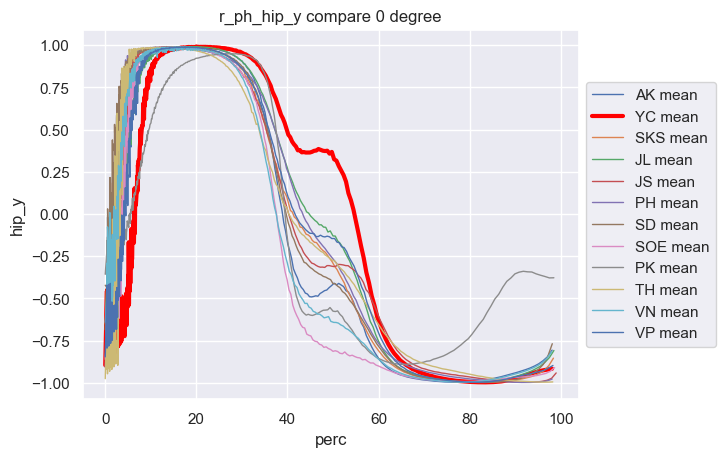

In [53]:
plt.plot(x, y, label='AK mean', linewidth='1', markersize ='1')
plt.plot(x2, y2, color='red', label='YC mean', linewidth='3', markersize='5')
plt.plot(x3, y3, label='SKS mean', linewidth='1', markersize ='1')
plt.plot(x4, y4, label='JL mean', linewidth='1', markersize='1')
plt.plot(x5, y5, label='JS mean', linewidth='1', markersize ='1')
plt.plot(x6, y6, label='PH mean', linewidth='1', markersize='1')
plt.plot(x7, y7, label='SD mean', linewidth='1', markersize ='1')
plt.plot(x8, y8, label='SOE mean', linewidth='1', markersize='1')
plt.plot(x9, y9, label='PK mean', linewidth='1', markersize ='10')
plt.plot(x10, y10, label='TH mean', linewidth='1', markersize='1')
plt.plot(x11, y11, label='VN mean', linewidth='1', markersize ='1')
plt.plot(x12, y12, label='VP mean', linewidth='1', markersize='1')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(feature2 + '_y' + ' compare ' + degree + ' degree')
plt.ylabel(feature)
plt.xlabel('perc') 

Text(0.5, 0, 'perc')

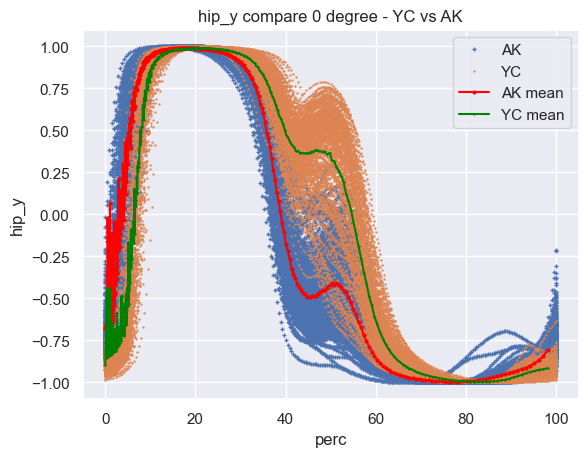

In [54]:
plt.plot(ak_perc[0:], ak_lcop[0:], label='AK', marker='+', markersize='2.5', linestyle='None')
plt.plot(yc_perc[0:], yc_lcop[0:], label='YC', marker='.', markersize='1.3', linestyle='None')
plt.plot(x, y, color='red', label='AK mean', marker='o', markersize ='2')
plt.plot(x2, y2, color='green', label='YC mean', marker='x', markersize='1')
plt.legend()
plt.title(feature + ' compare ' + degree + ' degree - YC vs AK')
plt.ylabel(feature)
plt.xlabel('perc') 

In [55]:
type(ak['perc'])

pandas.core.series.Series